<a href="https://colab.research.google.com/github/Barragan17/CNN-Exercise/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"linusrandu","key":"b942f23fff91bf02cdf2f2df08f5df3b"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 443M/450M [00:05<00:00, 68.6MB/s]
100% 450M/450M [00:05<00:00, 86.0MB/s]


In [3]:
from zipfile import ZipFile
file_name = 'flowers-recognition.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [1]:
import cv2
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_dataset(urls):
  images = []
  for url in urls:
    i = 0
    for image in os.listdir(url):
      img = cv2.imread(os.path.join(url,image))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (320,240))
      images.append(img)
      i += 1
      if i == 100:
        break

  labels = []
  for j in range(len(urls)):
    for i in range(100):
      y = j
      labels.append(y)
  return images, labels

In [3]:
dandelion = '/content/flowers/flowers/dandelion'
rose = '/content/flowers/flowers/rose'
sunflower = '/content/flowers/flowers/sunflower'

images, labels = load_dataset([dandelion, rose, sunflower])

In [4]:
np.array(images).shape

(300, 240, 320)

In [5]:
np.array(labels).shape

(300,)

In [6]:
def visualize_data(data):
  plt.figure(figsize = (30,30))
  for i in range(3):
    img = data[100*i]
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(str(labels[100*i]))

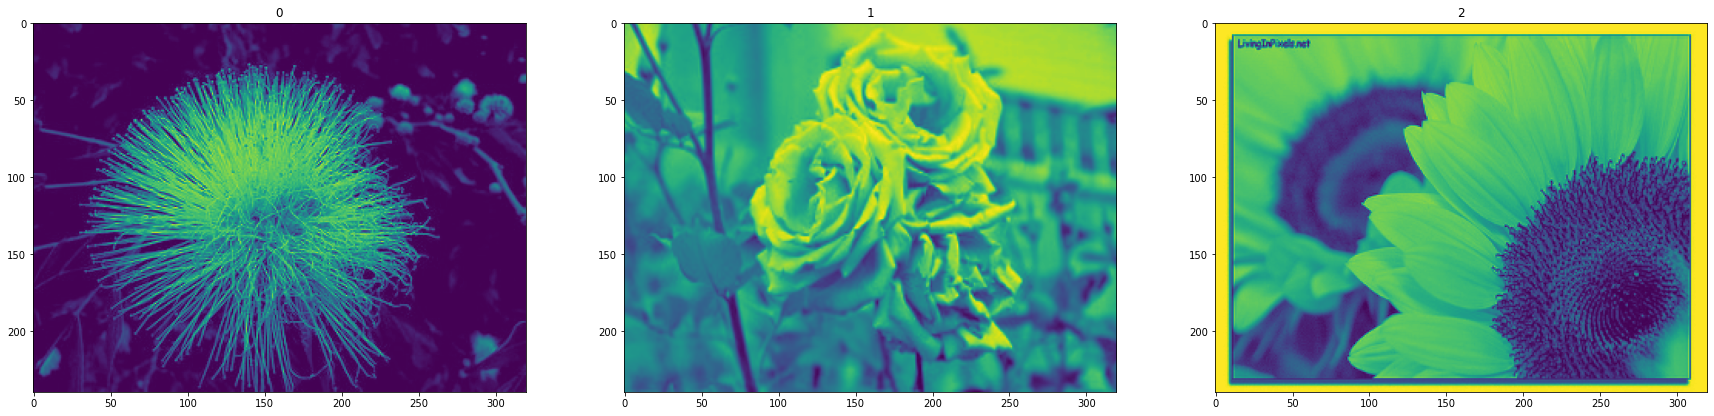

In [7]:
visualize_data(images)

In [8]:
from sklearn.model_selection import train_test_split as split
def train_test_split (X, Y, trainSize):
    X_train, X_test, Y_train, Y_test = split(X, Y, train_size = trainSize)
    return X_train, X_test, Y_train, Y_test

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, 0.8)

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 0.8)

In [11]:
width = np.array(images).shape[1]
print(width)

240


In [12]:
height = np.array(images).shape[2]
print(height)

320


In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [14]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train,num_classes = 3)
Y_test = to_categorical(Y_test,num_classes = 3)
Y_val = to_categorical(Y_val,num_classes = 3)

In [15]:
alpha = 0.1
epoch = 50

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [18]:
validation_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
X_train = np.expand_dims(X_train, axis=3)
X_val = np.expand_dims(X_val, axis=3)

In [20]:
train_gen = train_datagen.flow(
    X_train,
    Y_train,
    batch_size=64
)

In [21]:
val_gen = validation_datagen.flow(
    X_val,
    Y_val,
    batch_size=64
)

In [26]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same', input_shape=(width, height, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model2.summary()

# Compile Model. 
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=alpha),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 240, 320, 64)      640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 120, 160, 64)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 120, 160, 64)      256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 120, 160, 64)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1228800)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               314573056 
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [27]:
history2 = model2.fit_generator(
    train_gen,
    epochs=epoch,
    verbose=1,
    validation_data=val_gen,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
3/3 [==============================] - 36s 12s/step - loss: 3.1689 - accuracy: 0.3802 - val_loss: 153.2053 - val_accuracy: 0.2708
Epoch 2/50
3/3 [==============================] - 33s 11s/step - loss: 3.3339 - accuracy: 0.3646 - val_loss: 17.6687 - val_accuracy: 0.3542
Epoch 3/50
3/3 [==============================] - 33s 11s/step - loss: 2.9313 - accuracy: 0.3594 - val_loss: 31.4620 - val_accuracy: 0.4167
Epoch 4/50
3/3 [==============================] - 34s 12s/step - loss: 2.2306 - accuracy: 0.3854 - val_loss: 15.5922 - val_accuracy: 0.4375
Epoch 5/50
3/3 [==============================] - 33s 11s/step - loss: 2.2726 - accuracy: 0.3490 - val_loss: 25.2368 - val_accuracy: 0.3542
Epoch 6/50
3/3 [==============================] - 33s 11s/step - loss: 1.8153 - accuracy: 0.3698 - val_loss: 23.7362 - val_accuracy: 0.4375
Epoch 7/50
3/3 [==============================] - 32s 11s/step - loss: 1.6847 - accuracy: 0.3958 - val_loss: 31.2353 - val_accuracy: 0.4375
Epoch 8/50
3/3 [===

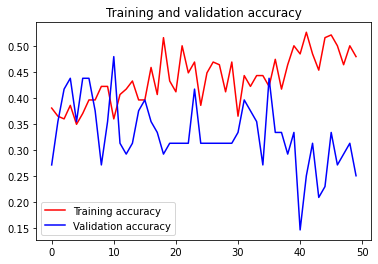

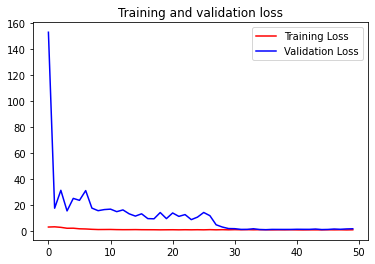

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()